In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import numpy as np

In [2]:
# Set the input image size for the VGGNet model
input_shape = (224, 224, 3)

# Load the VGGNet model with pre-trained weights
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False


# Build the transfer learning model
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(5, activation='softmax'))

In [3]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define the path to your dataset folder
dataset_dir = r'C:\Users\nerme\AI\Resnet50\Soil types'


In [4]:
# Set up the data generator with augmentation and preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Set the batch size and target image size
batch_size = 32
target_size = (224, 224)

# Create the data generator for training
train_generator = datagen.flow_from_directory(
    directory=dataset_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,
    subset='training'
)



Found 145 images belonging to 5 classes.


In [5]:
# Train the model
model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // batch_size,
    epochs=4

)

Epoch 1/4
4/4 [==============================] - 7s 1s/step - loss: 9.5936 - accuracy: 0.2655
Epoch 2/4
4/4 [==============================] - 4s 981ms/step - loss: 9.2490 - accuracy: 0.1947
Epoch 3/4
4/4 [==============================] - 4s 829ms/step - loss: 8.4990 - accuracy: 0.2832
Epoch 4/4
4/4 [==============================] - 4s 887ms/step - loss: 4.0432 - accuracy: 0.2920


In [6]:
# Save the trained model
model.save('model.h5')

C:\Users\nerme\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 1s 1s/step
predictions
[[2.0540597e-07 9.9999976e-01 7.1421735e-10 4.9991108e-08 7.7948998e-09]]
predicted_indx
[1]
Cinder Soil


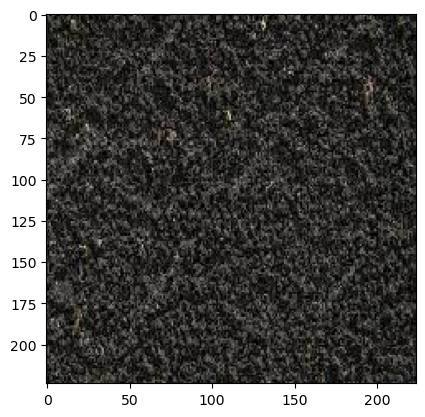

In [10]:
# Load the saved model
import matplotlib.pyplot as plt
import tensorflow as tf
loaded_model = tf.keras.models.load_model('model.h5')

from tensorflow.keras.preprocessing import image

# Load the new image
img = image.load_img(r'C:\Users\nerme\AI\Resnet50\TEST.jpg', target_size=(224, 224))

# Convert the image to a numpy array
img_array = image.img_to_array(img)

# Expand the dimensions of the image to match the input shape of the model
img_array = np.expand_dims(img_array, axis=0)

# Preprocess the image (e.g., normalize pixel values)
preprocessed_img = preprocess_input(img_array)

class_names = ['Black Soil', 'Cinder Soil', 'Laterite Soil', 'Peat Soil', 'Yellow Soil']

# Make predictions on the preprocessed image
predictions = loaded_model.predict(preprocessed_img)
print('predictions')
print(predictions)
# Get the predicted class index
predicted_class_index = np.argmax(predictions, axis=1)
print('predicted_indx')
print(predicted_class_index)

# Map the class index to the class name
predicted_class = class_names[predicted_class_index[0]]

print(predicted_class)

plt.imshow(img)
plt.show()